# Step 3: Exploratory Data Analysis

Goal: Explore trends, distributions, and patterns in the cleaned Netflix dataset, including:
- Growth of Netflix content over time
- Distribution of movies vs TV shows
- Geographic and rating trends
- Duration patterns

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("../data/netflix_titles_cleaned.csv")

In [65]:
# Count of shows vs movies
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

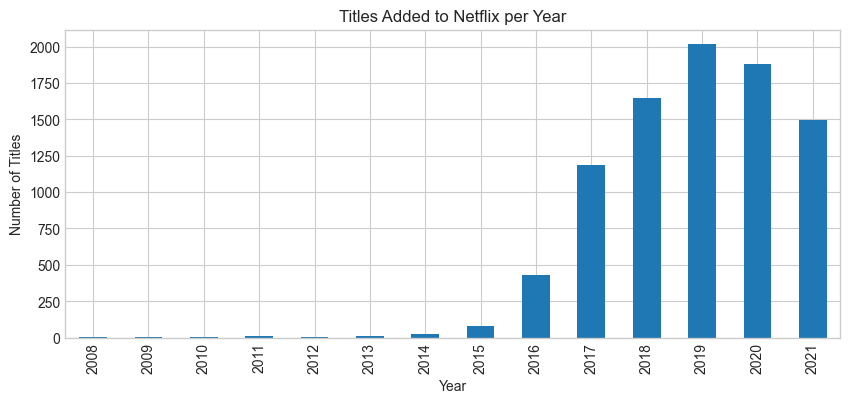

In [66]:
#Trend: How many titles added each year
titles_per_year = df['year_added'].value_counts().sort_index()

titles_per_year.plot(kind='bar', figsize=(10,4), title='Titles Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.savefig('../figures/titles_added_by_year.png')
plt.show()

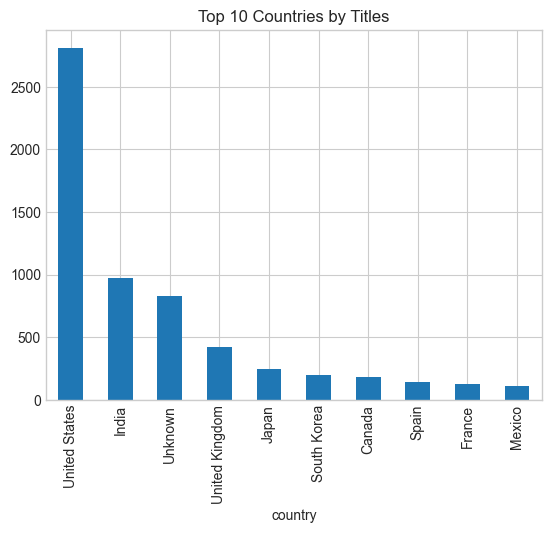

In [67]:
#Top 10 countries by number of titles
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Titles')
plt.savefig('../figures/top_countries.png')
plt.show()

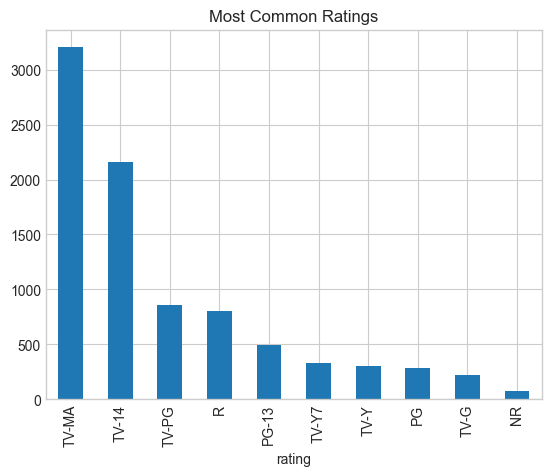

In [68]:
#Common ratings
df['rating'].value_counts().head(10).plot(kind='bar', title='Most Common Ratings')
plt.savefig('../figures/common_ratings.png')
plt.show()

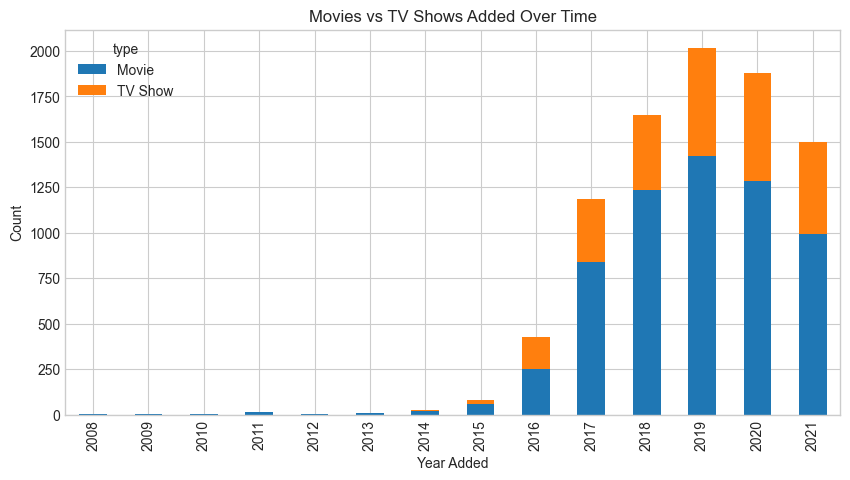

In [69]:
#Movies vs TV Shows over Time
content_type_trend = df.groupby(['year_added', 'type']).size().unstack()
content_type_trend.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.savefig('../figures/movies_vs_shows.png')
plt.show()

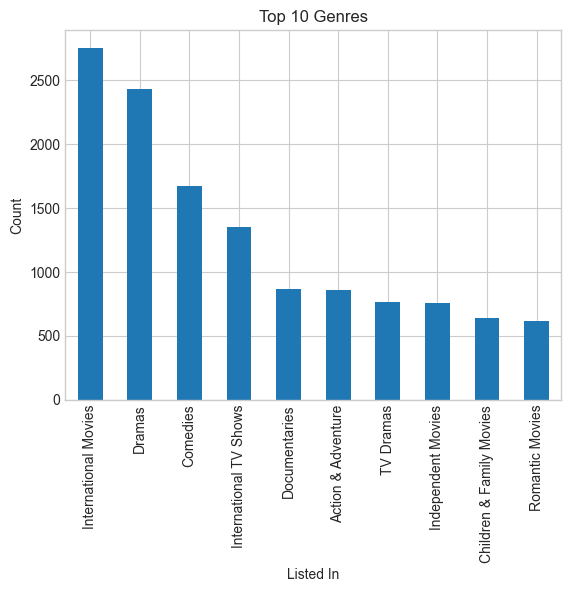

In [70]:
#Top 10 Genres
all_genres = df['listed_in'].str.split(', ')
genres_exploded = all_genres.explode()
genres_exploded.value_counts().head(10).plot(kind='bar', title='Top 10 Genres')
plt.xlabel("Listed In")
plt.ylabel("Count")
plt.savefig('../figures/top_genres.png')
plt.show()


In [71]:
#Split movies and TV shows
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

#Convert string durations into numeric values
movies['duration_mins'] = movies['duration'].str.replace(' min', '').astype(float)
shows['seasons'] = shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

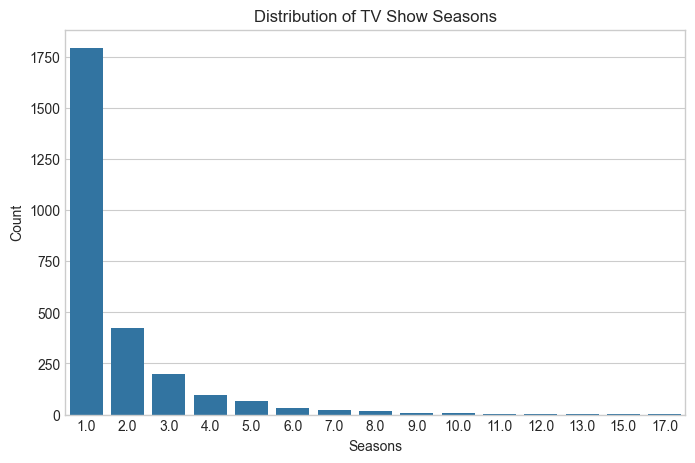

In [72]:
#TV Seasons Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='seasons',data=shows)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.savefig('../figures/show_seasons_distribution.png')
plt.show()

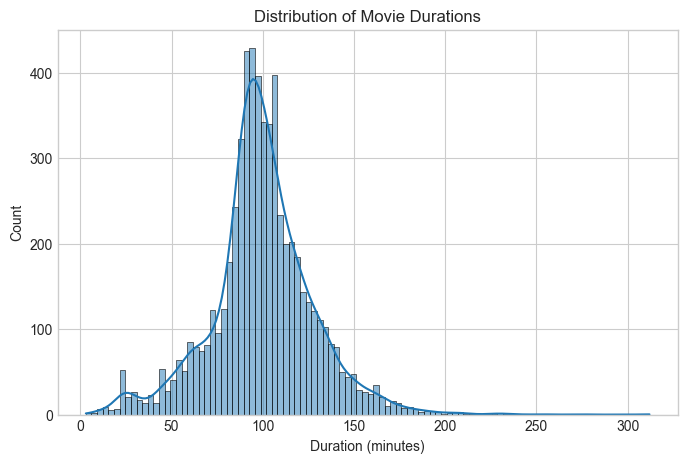

In [73]:
#Movie Duration Distribution
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_mins'],bins=100,kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.savefig('../figures/movie_duration_distribution.png')
plt.show()

### Key Insights
- Netflix has rapidly increased its library since 2015.
- TV Shows now make up a growing share of new content.
- The United States and India dominate the catalog.
- Most movies are between 90-120 minutes long.
- Almost all TV Shows are only one season long.
- Ratings are concentrated in TV-MA and TV-14 categories.
- Most movies and TV Shows are dramas or comedies.